# Social Computing/Social Gaming - Summer 2025
# Exercise Sheet 1 - Introduction to Python and Network Visualization
Welcome to the 2025 Social Computing / Social Gaming tutorial assignments. For all exercise sheets Python is the programming language of choice. This exercise sheet will therefore provide an introduction to Python for you. In the latter part of this exercise sheet you will take on your first Social Computing task.

In addition to the iPython notebooks, it is recommended to have a look at the introduction videos and/or the introduction slides, both provided on Moodle, for every exercise sheet as they contain **helpful hints** and the **form of the assignment** which is **mandatory**!

In [121]:
#Import the required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.patches as mpatches ## to add a legend to the final graph


## Task 1.1: Text-based game
To get you prepared for using Python in the upcoming exercise sheets we will introduce some of Python's most important features on the example of a text-based game. The first assignment is to **create** an additional inventory for your character to later pick up from in form of a list and populate it with different items.

In [105]:
# Populate your additional inventory
additional_inventory = ["potion", "bow", "arrow"]

**a)** **Implement** a function `create_character()` that allows players to **customize** their character. Players can enter a name and choose a profession (Warrior, Mage, or Rogue). The character is then saved as a dictionary with keys for name, profession, health, and inventory as a list. You can add other fields that you like as well.

**Validate** the profession, defaulting to "Warrior" if an invalid choice is entered. Character should be saved in form of dictionary containing keys for name, profession, health and inventory as a list. 

**Hint**: dictionaries may contain items of different types as integers, strings, lists, etc. at the same time.

In [106]:
def create_character():
    print("Welcome to the new World!")
    print("Please, create your character now :)")
    character = { }
    inventory = ['Sword']
    
    # Implement logic for character customization
    # Handle user input for character name and profession

    # Check if the name is a string, otherwise return an error message
    new_name = input("Enter your character's name: ")
    if type(new_name) != str or new_name.strip() == "":
        print("Name must be a non empty string!")
        return ""
    else:
        name = new_name
    
    new_profession = input("Choose your profession (Warrior, Mage, Rogue): ").strip().capitalize()
    # Validate the chosen profession, defaulting to "Warrior" if invalid
    if new_profession not in ['Warrior', 'Mage', 'Rogue']:
        profession = 'Warrior'
        print(f"Invalid profession '{new_profession}'. Defaulting to 'Warrior'.")
    else:
        profession = new_profession
    
    # Add additional items to the inventory based on the profession
    if profession == 'Warrior':
        inventory.append('Shield')
    elif profession == 'Mage':
        inventory.append('Staff')
    elif profession == 'Rogue': 
        inventory.append('Dagger')
    
    # You are free to add other fields to the character if you want

    # Assign values to character dictionary
    character['name'] = name
    character['health'] = 100
    character['inventory'] = inventory
    character['profession'] = profession
    
    print(f"Character created: {character['name']}, Profession: {character['profession']}, Inventory: {character['inventory']}")
    return character

In [107]:
character = create_character()

Welcome to the new World!
Please, create your character now :)
Character created: Chiara, Profession: Mage, Inventory: ['Sword', 'Staff']


**b)** In Python, variables are not constrained to fixed datatypes, allowing diverse elements within lists. This exercise demonstrates this flexibility by utilizing different types of variables as parameter for a `handle_action()` function. Additionally, it introduces a simple game scenario where a character's encouters are determined by rolling a six-sided dice.

Now, let's dive into the intricacies of handling character actions within the text-based game. In this task, you'll focus on the `handle_action()` function, which is responsible for managing various elements of character interaction.

Your goal is to **implement** logic within `handle_action()` that appropriately responds to different types of actions. The function takes two parameters: `action` and `character`. Here are the rules for handling each type of action:

1. If `action` is an integer:
    - Treat it as an attack.
    - Subtract the value of the action from the character's health.
    - Print the enemy's attack strength and the character's health after the attack.

2. If `action` is a string:
    - Treat it as an item to add to the character's inventory.
    - Print a message indicating that the character found the item and add it to the inventory list.

3. If `action` is a function:
    - Call the function, passing the character as an argument.
    - Print the result of the custom function.

4. If `action` is of any other type:
    - Print a message indicating that the element is unhandled.


**Hint:** https://docs.python.org/3/library/functions.html#isinstance
https://docs.python.org/3/library/functions.html#callable


In [108]:
def handle_action(action, character):
    # Implement logic for handling different actions with character interaction
    # If the action is integer, treat is as an attack and decrease character's health accordingly
    if type(action) == int:
        character['health'] -= action
        if character['health'] < 0:
            character['health'] = 0
            print(f"{character['name']} has been defeated!")
        else:
            print(f"{character['name']} has been attacked! The enemy's attack strength was {action}. Health is now {character['health']}.")
            
    # If the action is string, treat it as items to add to the inventory
    elif type(action) == str:
        character['inventory'].append(action)
        print(f"{character['name']} has found {action} and added it to the inventory.")
        
    # If the action is a function, call the function with character as parameter
    elif callable(action):
        output = action(character)
        if output is not None:
            print(output)
    
    else:
        print("Invalid action. Please provide an integer for attack, a string for item, or a function to call.")

**c)** The provided code below implements specific game logic functions that are going to be used in our game. **Read** the functions and understand their uses.  

In [109]:
# Function to roll a six-sided dice
def roll_dice():
    return random.randint(1, 6)

# Function to calculate attack
def attack():
    return random.randint(15, 30)

# Function to get the last item from additional inventory
def get_new_item():
    if len(additional_inventory):
        item = additional_inventory[-1]
        additional_inventory.pop()
    else:
        item = None
    return item
    
# Function for exploring the woods by fighting enemies and finding items
def explore_woods(character):
    dice = roll_dice()
    print(f"You rolled a {dice} on the dice.")
    
    # If dice roll is greater than 2, encounter a monster
    if dice > 2:
        print(f"As {character['name']} explores the woods, you come across a terrifying monster!")
        response = input("Do you want to fight the monster? (Y/N): ").strip().lower()
        
        if response == 'y':
            damage_received = attack()
            handle_action(damage_received, character)
            
            if character['health'] <= 0:
                print("You fought bravely but succumbed to your wounds. You died :(")
                character['health'] = 0  # Ensure health doesn't go negative
            else:
                print("You successfully defeated the monster!")
                print(f"Current health points: {character['health']}")
        elif response == 'n':
            print("You decided to run away and lived to fight another day.")
        elif response == 'quit':
            print("Invalid input. You hesitated and the monster disappeared into the shadows.")
    
    # If dice roll is 2 or less, find an item or reach item limit
    else:
        item_found = get_new_item()
        
        if item_found:
            handle_action(item_found, character)
            print(f"You found a {item_found}! It has been added to your inventory.")
            print(f"Current inventory: {character['inventory']}")
        else:
            print(f"{character['name']} found no new items. You've collected everything there is to find!")


**Implement** the game loop by defining the function `play()`. The function should continue to run until the user either decides to quit the game or the `character[health]` is reduced to 0. This will simulate user input as decisions made by the character, such as encountering monsters or acquiring new items.

**Hint:** Use the `handle_action` function to incorporate the logic for exploring within the game.

In [111]:
def play(character):

    # Implement a loop that breaks according to user input or to character's health         
    # Tip: Use handle_action to simulate the character's exploration
    
    while character['health'] > 0:
        user_input = input("Enter command (explore/quit): ").strip().lower()
        if user_input == "explore":
            handle_action(explore_woods, character)
        elif user_input == "quit":
            print("Quitting the game. Goodbye!")
            break
        else:
            print("Unknown command. Type 'explore' to continue or 'quit' to exit.")
            

my_character = create_character()
play(my_character)

Welcome to the new World!
Please, create your character now :)
Character created: Francesco, Profession: Rogue, Inventory: ['Sword', 'Dagger']
You rolled a 3 on the dice.
As Francesco explores the woods, you come across a terrifying monster!
Francesco has been attacked! The enemy's attack strength was 16. Health is now 84.
You successfully defeated the monster!
Current health points: 84
You rolled a 3 on the dice.
As Francesco explores the woods, you come across a terrifying monster!
You decided to run away and lived to fight another day.
You rolled a 2 on the dice.
Francesco has found arrow and added it to the inventory.
You found a arrow! It has been added to your inventory.
Current inventory: ['Sword', 'Dagger', 'arrow']
You rolled a 4 on the dice.
As Francesco explores the woods, you come across a terrifying monster!
Francesco has been attacked! The enemy's attack strength was 17. Health is now 67.
You successfully defeated the monster!
Current health points: 67
Unknown command. Ty

## Task 1.2: Twitch Social Network with NetworkX

For your second task, we will continue exploring Social Computing / Social Gaming with a focus on German streamers from [Twitch](https://www.twitch.tv/) [1]. Twitch is an international platform for live-streaming games and other content. The dataset [2], created in 2019, contains extensive information about different streamers.
For our tasks we will only consider the German Twitch-streamers. Twitch offers lots of functionalities including a friendship system. The task is to draw a graph representing the **friendship network** of the hundred most watched German streamers.

**Read** in the data set by using the **Pandas** library [3]. For a quick overview, you can refer to [4]. Pandas provides a powerful data structure called the ''DataFrame'' which is widely used in data science and machine learning. For your exercise sheets it will always come in handy to have a look at the used package's **documentations** online!

**Inspect** the three dataframes to fully understand what they contain. Don't confuse the Twitch IDs (``id``) with the node's IDs for our data set (``new_id``), which will form the key for our dataset.

**Hint:** You can have a look at the first entries of your Pandas data-frames with `Dataframe.head(10)`.

In [112]:
#Contains a multitude of information about the streamers (adressed by their Twitch IDs).
nodes_DF = pd.read_csv('musae_DE_target.csv', delimiter=";")
#Contains the friendship relations between streamers.
edges_DF = pd.read_csv('musae_DE_edges.csv', delimiter=";")
#Contains the names of the top 100 Twitch-streamer for their Twitch IDs.
twitch_names_DF = pd.read_csv('TwitchIDList.csv', delimiter=";")

In [113]:
print(nodes_DF.head(10))
print(edges_DF.head(10))
print(twitch_names_DF.head(10))

          id  days  mature   views  partner  new_id
0   37905227  2149    True  162078    False    5079
1   63102384  1574    True    1370    False    4281
2  109414094  1034    True    6043    False     992
3   84163849  1319    True   94298     True    9021
4   38240837  2137    True    2323    False     330
5   75568017  1411    True     807    False    2833
6   38019892  2145   False   43650    False    5069
7  101004172  1137   False   27815    False    7798
8  212738936   187    True    2356    False    5109
9   36580131  2196    True    8723    False     410
   from    to
0     0  9206
1     0  7787
2     0  2145
3     0  2684
4     0  7275
5     0  2498
6     0  5358
7     1  5506
8     1  1753
9     1  4361
   new_id              name
0    8753  summonersinnlive
1    9206     rocketbeanstv
2    7787            gronkh
3    2498        ungespielt
4    2452            bonjwa
5    3234         miss_rage
6    1584           trymacs
7     430          germench
8    2684        royal

**a)** First, we will deal with our graph's nodes, the streamers. 
We are only interested in streamers who have been streaming for more than 1000 days. **Filter** the data to contain only such rows.
There are some columns we will not need later. **Remove** the unnecessary information by **dropping** the `id` and `days` columns from `nodes_DF`. 
Then, to limit our data to the 50 most followed streamers **sort** `nodes_DF` by `views` and only **keep** the first 50 entries as `ordered_nodes_DF`.

In [114]:
# Filter nodes to those with more than 1000 streaming days; 
nodes_DF = nodes_DF[nodes_DF['days']>1000]
# Remove `id` and `days` columns;
nodes_DF = nodes_DF.drop(columns=['id', 'days'])
# Sort by views 
ordered_nodes_DF = nodes_DF.sort_values(by='views', ascending=False)
# Keep 50 first entries 
ordered_nodes_DF = ordered_nodes_DF.head(50)

print(ordered_nodes_DF)

      mature      views  partner  new_id
4254   False  100394785     True    8753
1091   False   70620803     True    9206
2610   False   54516100     True    7787
7546   False   28609290     True    2498
6054   False   27149993     True    2452
6967    True   20685319     True    3234
7272   False   19025146     True    1584
6528    True   16380941    False     430
5507    True   16374430     True    2684
6202    True   15488218     True    4927
3448    True   15299339     True    1638
8041   False   14475068     True    2145
3695   False   14454745     True    2816
1117    True   13988066     True    8769
2831   False   13583296     True    4042
3811   False   13466529     True    8614
6820   False   11764956     True    1550
6332    True   11011284     True    1664
8562   False   10886778     True    7524
9186   False   10755911     True    3828
9497   False   10638954     True    4451
273    False   10154651     True    7216
1009   False    9536357     True    3023
9032   False    

**b)** Now we need to work on the friendship data-frame, our graph's edges. As we will only draw the top 50 streamers as nodes, we are only interested in friendship relations in between these 50 nodes. The relations are represented as "from" -> "to" even though the friendship relation is considered undirected.

**Fill** the list  `out_target_indices` with all entry's indices that have their target outside of our 50 nodes. Therefore go through all entries of `edges_DF` and check if their `to` value is contained in `nodes`.
Then **drop** all the `out_target_indices` entries from our edges data-frame `edges_DF`.

**Hint:** We do not need to worry about the `from` values as our merging process will take care of that part in the next task.

In [115]:
nodes = ordered_nodes_DF['new_id'].tolist()
out_target_indices = []

# Fill the list `out_target_indices` with all entry's indices that have their target outside of our 50 nodes;
for idx, row in edges_DF.iterrows():
    if row['to'] not in nodes:
        out_target_indices.append(idx)


# Drop the entries with out-targets
edges_DF = edges_DF.drop(index=out_target_indices) 

**c)** For the next step, we now have to **merge** our dataframes: `ordered_nodes_DF` and `edges_DF` - and save the merged data-frame as `merged_DF`.
This works similar to a SQL Join operation. We want to use a **merge(how='inner')** (similar to an "inner"=="normal" join in SQL) and make sure the node's `new_id` matches the friendship relation's origin, namely the `from` column. Thus it will only consider any friendships of our 50 nodes.


SQL join: https://www.w3schools.com/sql/sql_join.asp \
Pandas merge: https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge

In [116]:
merged_DF = []
# Merge `ordered_nodes_DF` with `edges_DF` into `merged_DF`

merged_DF = pd.merge(ordered_nodes_DF, edges_DF, left_on='new_id', right_on='from', how='inner')

print(merged_DF)

     mature      views  partner  new_id  from    to
0     False  100394785     True    8753  8753  9206
1     False   70620803     True    9206  9206  7802
2     False   54516100     True    7787  7787  7802
3     False   54516100     True    7787  7787  8614
4     False   54516100     True    7787  7787  8769
..      ...        ...      ...     ...   ...   ...
261    True    5848441     True    4912  4912  8803
262    True    5452518     True    8782  8782  7802
263    True    5452518     True    8782  8782  9206
264   False    5448573     True    7913  7913  9187
265   False    5448573     True    7913  7913  8468

[266 rows x 6 columns]


Now networkX [5] **reads** all the edges from our dataframe and creates a Graph object. **Take a look** at the number of nodes in your graph. **Explain** your observations shortly.

In [117]:
graph = nx.from_pandas_edgelist(merged_DF, "new_id", "to")

#Print the number of graph nodes

print(len(graph.nodes))

46


*OBSERVATION*: Our analysis focused only on connections between the top 50 streamers. In the merged_DF, we observe 266 connections among them. However, when building the graph, only 46 nodes appear, meaning that only 46 streamers are involved in relationships within the top 50. The remaining 4 have no connections with the rest of the top 50.

**d)** Before we finally draw our graph, let's add some **additional information** to it. We want to represent if the respective streamer has mature content  by the **color** of a node.  The `mature` column in our dataframe will provide you with the mature-status. 

All entries were represented by their ID until now. To make our graph readable we want to name all nodes with the streamers' actual names that are contained in `twitch_names_DF`. You have now to **create two dictionaries** that map the nodes ID to its mature status and streamer's name.

Thereafter the given code will create the colormap from your dictionary, that will later be used to apply the colors to our graph. Then the graph object is created.

**Hint:** As `twitch_names_DF` only contains the most 50 viewed streamer's names you can use it as an indicator whether you have solved everything correctly.

In [118]:
# Create 2 dictionaries with: 1. mapped `new_id` to `mature` status; 2. mapped `new_id` to `name`
mature_dict = dict(zip(ordered_nodes_DF["new_id"], ordered_nodes_DF["mature"]))
name_dict = dict(zip(twitch_names_DF["new_id"], twitch_names_DF["name"]))

print(len(mature_dict))
print(len(name_dict))

colormap = []
for node in graph:
    if(mature_dict[node] == True):
        colormap.append('Pink')
    else:
        colormap.append('Purple')

graph = nx.relabel_nodes(graph, name_dict)


50
50


**e)** Now to conclude your first exercise sheet you can finally draw the graph. NetworkX offers you multiple pre-defined **[graph layouts](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)** [6] that you can use. Don't forget to make use of the ``colormap`` and the set options! Matplotlib will then print your graph.

**Try** out the different layouts and choose what fits the graph better. Then **explain** why does it fit well and what **observations** you could draw from our visualized network shortly!

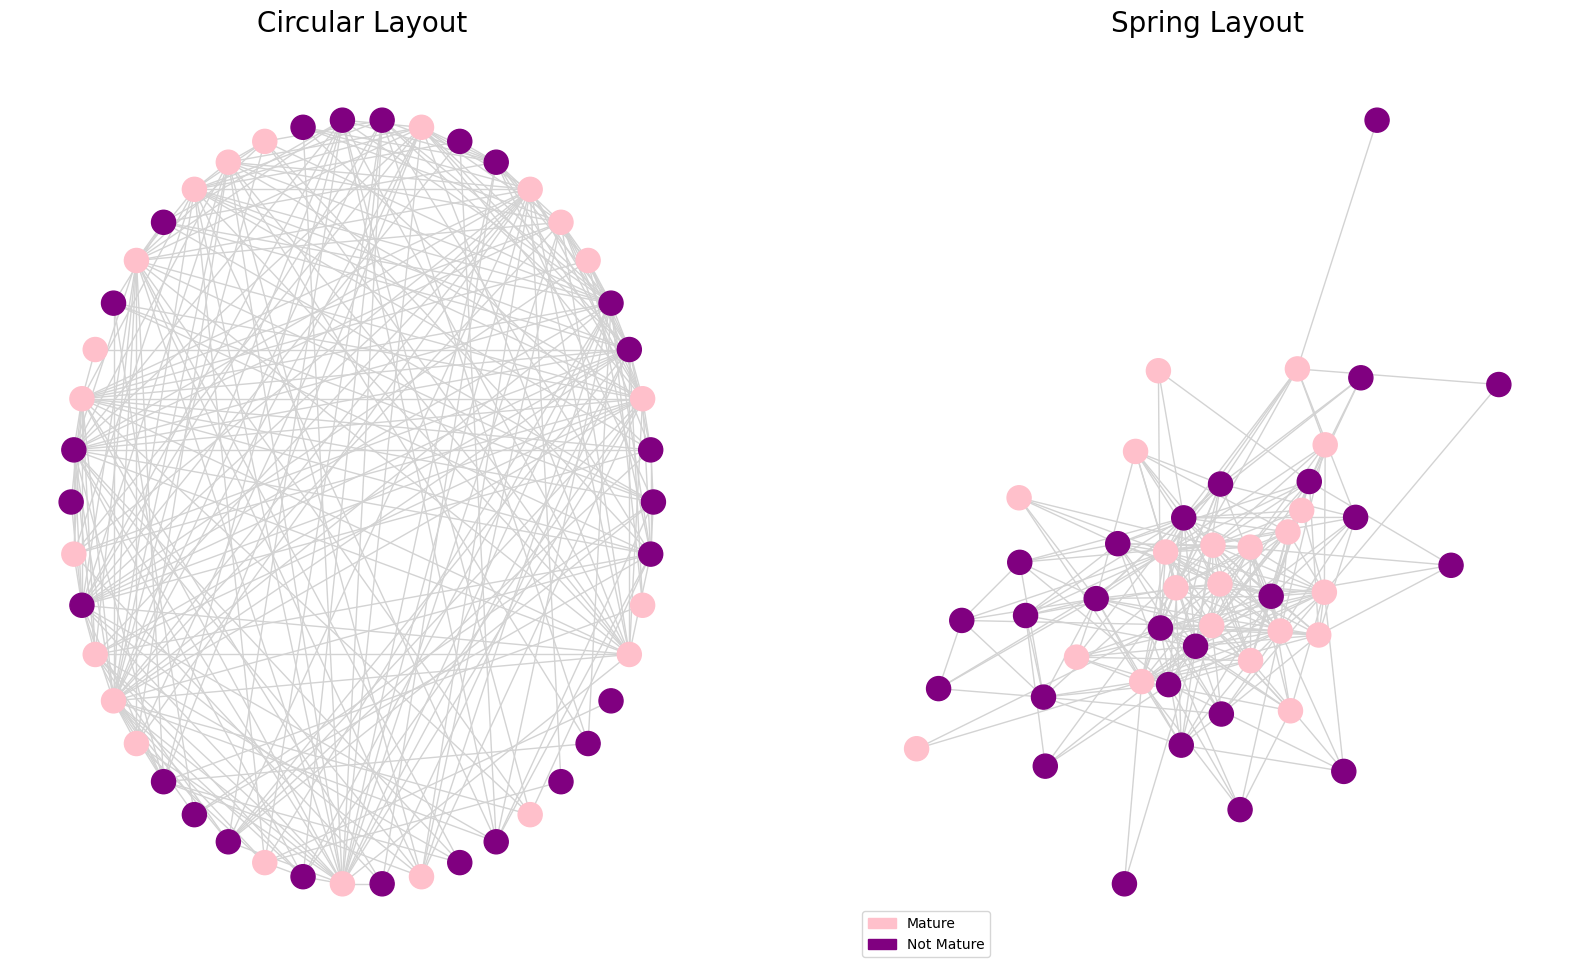

In [ ]:
layout_options = [nx.circular_layout(graph), nx.spring_layout(graph)]
# Draw the network with Circular and Spring layouts, 
# and use colormap for node colors and use apropriate layout_options for `pos`

plt.figure(1, figsize=(20, 12))
options = {
    "font_size": 30,
    "edge_color": 'lightgray',
}

layout_options = [nx.circular_layout(graph), nx.spring_layout(graph)]

for i, layout in enumerate(layout_options):
    plt.subplot(1, 2, i + 1)
    nx.draw(graph, pos=layout, node_color=colormap, **options)
    title = "Circular Layout" if i == 0 else "Spring Layout"
    plt.title(title, fontsize=20)
    
legend_handles = [
    mpatches.Patch(color='Pink', label='Mature'),
    mpatches.Patch(color='Purple', label='Not Mature')
]
plt.legend(handles=legend_handles, loc='lower left', fontsize=10)

plt.show()


**Write your observations of the graph representations here:**

In the circular layout on the left, the nodes are evenly spaced around a circle. The graph looks very symmetrical, but the overlapping edges make it hard to see who is connected to whom or which streamers have more connections than others.

In contrast, the spring layout on the right places nodes based on how connected they are. This makes it easier to spot groups of connected streamers and identify the more isolated ones. The most central nodes tend to have more connections, while those on the edges have fewer links. Overall, the spring layout gives a clearer view of the network’s structure and the relationships between streamers.

## Feedback
We're always looking for improvements. Please share your feedback; tell us where you had difficulties or what you'd change to make things better in this assignment sheet.

**Note:** All feedback will be saved anonymous, so feel free to be open and honest!

**Please write your feedback here:**

## References

<br>[1] https://www.twitch.tv/
<br>[2] Rozemberczki, B., Allen, C. & Sarkar, R. (2019). *Multi-scale Attributed Node Embedding*
<br>[3] https://pandas.pydata.org/docs/getting_started/index.html
<br>[4] https://pandas.pydata.org/docs/user_guide/10min.html
<br>[5] https://networkx.org/documentation/stable/reference/index.html
<br>[6] https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout